# Machine Learning
## Programming Assessment 5: Neural Networks

### Instructions


*   The aim of this assignment is to learn machine learning tools - Keras, Sklearn and PyTorch.
*   You must use the Python programming language.
*   You can add as many code/markdown cells as required.
*   ALL cells must be run (and outputs visible) in order to get credit for your work.
*   Please use procedural programming style and comment your code thoroughly.
*   There are three parts of this assignment. The import statements for the required libraries is already given.


### Introduction
In this assignment, you will be using neural networks to implement a simplified version of a speech recognizer which aims to identify what digit has been spoken in a given audio file.

In order to accomplish this, you will be using different toolkits, popularly used in machine learning for training models. In this assignment, you will be introduced to Sklearn, Keras, and Pytorch. An implementation from scratch is not required for the purposes of this assignment.

Have fun!

In [1]:
import numpy as np
import pandas as pd

## Part 1: Feature Extraction
You will the MNIST audio dataset which can be downloaded from [here](https://www.kaggle.com/datasets/sripaadsrinivasan/audio-mnist). The dataset contains audio recordings, where speakers say digits (0 to 9) out loud. Use the following line of code to read the audio file:
```python
audio, sr = librosa.load(file_path, sr=16000)
```
You need to extract MFCC features for each audio file, the feature extraction code is give (you can read about MFCC from [here](https://link.springer.com/content/pdf/bbm:978-3-319-49220-9/1.pdf)). Length of each feature vector will be 13. You need to save all the feature vectors in a csv file with ith column representing ith feature, and each row representing an audio file. Add a 'y' column to the csv file and append the labels column at the end. Your csv file should look like this:

| x1 | x2 | x3 | x4 | x5 | x6 | x7 | x8 | x9 | x10 | x11 | x12 | x13 | y |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| -11.347038 | -8.070062 | -0.915299 | 6.859546 | 8.754656 | -3.440287 | -5.738487 | -21.853178 | -9.859462 | 3.584948 | -2.661195	| 1.023747 | -4.574332 | 2 |

Print out 2 vectors in this notebook.

Split the dataset into train and test with 80:20 ratio. Print the train data size and test data size.

In [2]:
#kaggle.json uploaded
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install -q kaggle

In [4]:
!kaggle datasets download -d sripaadsrinivasan/audio-mnist

Dataset URL: https://www.kaggle.com/datasets/sripaadsrinivasan/audio-mnist
License(s): CC0-1.0


In [5]:
import zipfile
import os

# Unzip the dataset
with zipfile.ZipFile("audio-mnist.zip", "r") as zip_ref:
    zip_ref.extractall("audio_mnist")

# Show path to dataset files
print("Path to dataset files:", os.path.abspath("audio_mnist"))

Path to dataset files: /content/audio_mnist


In [6]:
!pip install librosa  python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=2581fcd845191e34c13f0defb0784bbc810a67ce5580cfa55335dfd82b389ce4
  Stored in directory: /root/.cache/pip/wheels/37/01/19/e6c69a32684ab7b2e3ea4985a571d810cf055c72600e7f9f17
Successfully built python_speech_features


In [7]:
from glob import glob
import python_speech_features as mfcc
import librosa
from sklearn.model_selection import train_test_split

In [8]:
def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

In [9]:
files = glob("audio_mnist/data/*/*.wav", recursive=True)
print("Total audio files:", len(files))

Total audio files: 30000


In [10]:
X = []
y = []

#  Extract features from all files
for file_path in files:
    try:
        # Load audio
        audio, sr = librosa.load(file_path, sr=16000)

        # Extract MFCC features
        features = get_MFCC(audio, sr)

        # Append to list
        X.append(features)

        # Label: Assume the digit is in the filename
        label = int(os.path.basename(file_path)[0])
        y.append(label)

    except Exception as e:
        print(f"Failed to process {file_path}: {e}")

In [11]:
# Create DataFrame and save to CSV
df = pd.DataFrame(X, columns=[f'x{i+1}' for i in range(13)])
df['y'] = y
df.to_csv("mfcc_features.csv", index=False)
print("Saved features to mfcc_features.csv")

Saved features to mfcc_features.csv


In [13]:
#Pinting Two Vectors from dataset by printing head of dataset
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,-10.983814,-10.895885,-7.072916,18.357224,-4.331453,-12.047793,-19.204160,-2.802019,7.655706,0.027910,-2.847536,5.530191,-0.639497,3
1,-11.758539,-13.099196,3.873553,22.905037,-9.725632,-3.438553,-9.934805,-1.237989,8.042800,-1.617887,-3.573632,4.013999,-0.320542,8
2,-10.436629,-4.465868,-6.179372,-4.391079,-7.395752,-3.333748,-1.651418,-1.224542,8.538851,-4.217718,0.412184,-2.331860,-4.846754,4
3,-11.088846,2.800699,-5.420423,11.907775,2.657051,-5.906424,-13.926769,-2.034793,1.882219,-6.721358,-5.350374,-10.801701,-15.478766,9
4,-11.866158,4.646954,-5.626842,7.768194,-0.141961,-0.437793,-20.955122,-3.152345,4.399502,-5.457578,-0.027097,-13.675503,-11.454354,9


In [16]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-10.685290,-6.195530,1.762325,6.015719,-2.105331,-7.068690,-5.921436,-6.063960,-1.304830,-1.854127,-2.354729,-0.421068,-4.402515,4.500000
std,1.171642,8.814683,6.752481,8.858834,7.457360,7.697912,8.390850,7.982406,7.011017,7.478188,6.333688,7.282753,5.852787,2.872329
min,-14.307671,-34.672361,-23.464859,-19.137175,-38.414334,-36.423609,-40.812237,-34.309248,-33.305233,-30.755446,-33.911275,-32.053215,-33.412981,0.000000
25%,-11.478421,-10.814527,-2.510250,-0.273465,-6.859819,-12.250617,-11.590952,-11.644062,-5.813954,-6.877016,-6.539827,-5.116070,-8.187016,2.000000
50%,-10.793923,-5.034481,2.172222,5.127510,-1.795363,-6.824552,-6.035499,-6.156813,-1.183534,-1.814846,-2.137927,0.187533,-4.145847,4.500000
75%,-10.011772,0.200845,6.505403,11.785881,3.217725,-1.704763,-0.260490,-0.707417,3.308875,3.441704,1.981812,4.674122,-0.343000,7.000000
max,-4.142219,16.933857,28.301245,36.782366,20.458879,20.799619,27.290283,24.607234,28.516775,34.672376,22.625149,24.102443,14.597010,9.000000


In [23]:
# Split into train and test with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Reshape y_train and y_test to (1, n_samples)
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

# Print the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24000, 13)
X_test shape: (6000, 13)
y_train shape: (1, 24000)
y_test shape: (1, 6000)


## Part 2: Neural Network Implementation

### Task 2.1:  Scikit-learn

In this part you will use the [Scikit-learn](https://scikit-learn.org/stable/index.html) to implement the [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and apply it to the MNIST audio dataset (provided in part 1). Split the training dataset into train and evaluation data with 90:10 ratio. Run evaluation on X_eval while training on X_train. Tune the hyperparameters to get the best possible classification accuracy. You need to report accuracy, recall, precision and F1 score on the test dataset and print the confusion matrix.

Expected value for accuracy is 87 or above.

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Further split training into 90% train, 10% eval
X_train_1, X_eval, y_train_1, y_eval = train_test_split(X_train, y_train.T, test_size=0.1, random_state=42)

# Reshape y_train_1 and y_eval to (1, n_samples) after the split
y_train_1 = y_train_1.T
y_eval = y_eval.T

# Print the shapes
print("X_train_1 shape:", X_train_1.shape)
print("X_eval shape:", X_eval.shape)
print("y_train_1 shape:", y_train_1.shape)
print("y_eval shape:", y_eval.shape)

X_train_1 shape: (21600, 13)
X_eval shape: (2400, 13)
y_train_1 shape: (1, 21600)
y_eval shape: (1, 2400)


In [28]:
# Define and train MLPClassifier with tuned hyperparameters

model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate_init=0.001,
    max_iter=300,
    random_state=42
)

In [29]:
# Train on the reshaped y_train_1 (flattened to 1D array)
model.fit(X_train_1, y_train_1.flatten())  # Flatten y_train_1 for compatibility

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)

In [30]:
#  Evaluate on eval set
eval_preds = model.predict(X_eval)
eval_acc = accuracy_score(y_eval.flatten(), eval_preds)  # Flatten y_eval for compatibility
print(f"\nEvaluation Accuracy: {eval_acc:.4f}")



Evaluation Accuracy: 0.9429


In [31]:
#  Final evaluation on test set
test_preds = model.predict(X_test)

acc = accuracy_score(y_test.flatten(), test_preds)  # Flatten y_test for compatibility
precision = precision_score(y_test.flatten(), test_preds, average='macro')
recall = recall_score(y_test.flatten(), test_preds, average='macro')
f1 = f1_score(y_test.flatten(), test_preds, average='macro')

print("\n📊 Test Set Evaluation Metrics:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


📊 Test Set Evaluation Metrics:
Accuracy:  0.9442
Precision: 0.9448
Recall:    0.9443
F1 Score:  0.9442


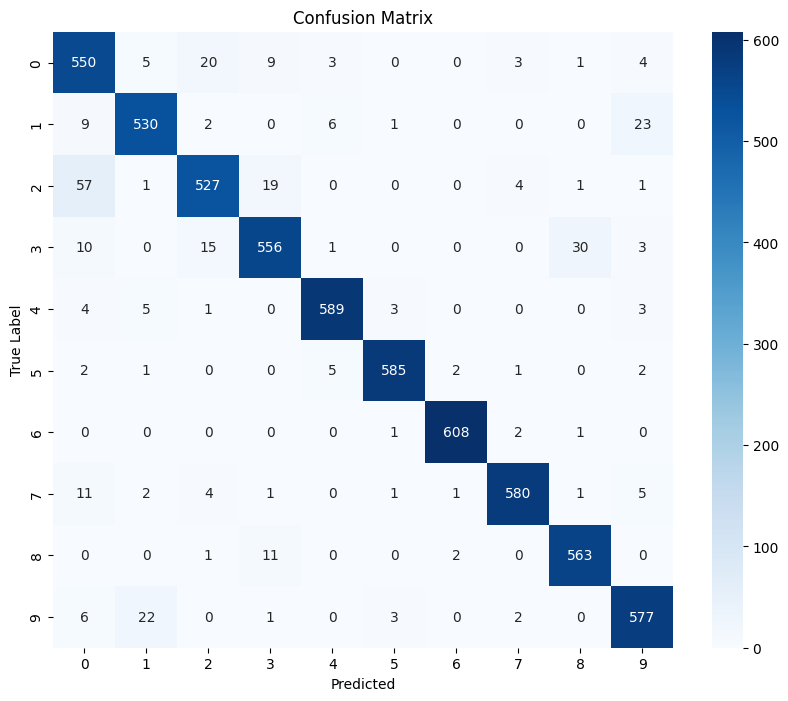

In [32]:
# Confusion matrix
conf_mat = confusion_matrix(y_test.flatten(), test_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.show()

### Task 2.2: Tensorflow Keras

In this part you will use the [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to implement the [Neural Network](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/) and apply it to the MNIST audio dataset (provided in part 1). Split the training dataset into train and evaluation data with 90:10 ratio. Run evaluation on X_eval while training on X_train. Tune the hyperparameters to get the best possible classification accuracy. You need to report accuracy, recall, precision and F1 score on the test dataset and print the confusion matrix.

Expected value for accuracy is 87 or above.

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import optimizers

In [51]:
import tensorflow as tf

In [52]:
from tensorflow.keras.utils import to_categorical

In [53]:
# Set the parameters accordingly
LEARNING_RATE = 0.001   # A commonly used default for Adam optimizer
BATCH_SIZE = 32         # Small batch size works well for small to medium datasets
EPOCHS = 50             # Enough epochs to converge; you can adjust based on training loss

In [54]:
# Further split training into 90% train, 10% eval
X_train_1, X_eval, y_train_1, y_eval = train_test_split(X_train, y_train.T, test_size=0.1, random_state=42)

# Reshape y_train_1 and y_eval to (1, n_samples) after the split
y_train_1 = y_train_1.T
y_eval = y_eval.T

# Print the shapes
print("X_train_1 shape:", X_train_1.shape)
print("X_eval shape:", X_eval.shape)
print("y_train_1 shape:", y_train_1.shape)
print("y_eval shape:", y_eval.shape)

X_train_1 shape: (21600, 13)
X_eval shape: (2400, 13)
y_train_1 shape: (1, 21600)
y_eval shape: (1, 2400)


In [55]:
#Build the model
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(13,)),  # Use Input layer explicitly
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [57]:
num_classes = len(np.unique(y_train_1))
print(num_classes)

10


In [58]:
# Flatten the labels
y_train_1 = y_train_1.flatten()
y_eval = y_eval.flatten()

# One-hot encode the labels
y_train_1_cat = to_categorical(y_train_1, num_classes=10)
y_eval_cat = to_categorical(y_eval, num_classes=10)

# Train the model
history = model.fit(
    X_train_1, y_train_1_cat,  # Use one-hot encoded labels
    validation_data=(X_eval, y_eval_cat),  # Use one-hot encoded labels
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5393 - loss: 1.5503 - val_accuracy: 0.8354 - val_loss: 0.4258
Epoch 2/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7914 - loss: 0.5578 - val_accuracy: 0.8600 - val_loss: 0.3634
Epoch 3/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8300 - loss: 0.4712 - val_accuracy: 0.8767 - val_loss: 0.3218
Epoch 4/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8449 - loss: 0.4160 - val_accuracy: 0.8888 - val_loss: 0.3003
Epoch 5/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8587 - loss: 0.3825 - val_accuracy: 0.8908 - val_loss: 0.2838
Epoch 6/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8632 - loss: 0.3734 - val_accuracy: 0.9038 - val_loss: 0.2649
Epoch 7/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8663 - loss: 0.3585 - val_accuracy: 0.9033 - val_loss: 0.2591
Epoch 8/50
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8754 - loss: 0.3320 - val_accuracy: 0.

In [59]:
y_test = y_test.flatten()
y_test_cat = to_categorical(y_test, num_classes=10)
#  Evaluate on test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [60]:
# Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("\n📊 Test Set Evaluation:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


📊 Test Set Evaluation:
Accuracy:  0.9350
Precision: 0.9347
Recall:    0.9350
F1 Score:  0.9347


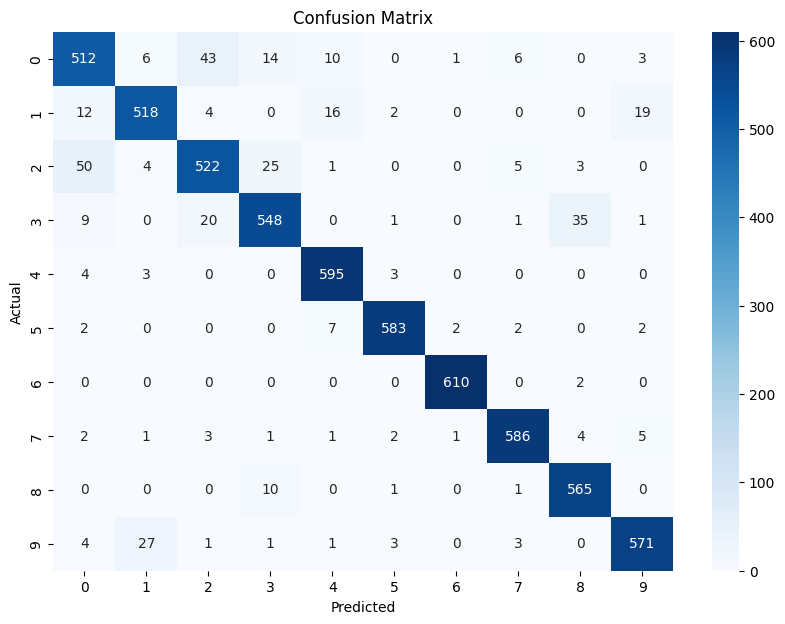

In [61]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Task 2.3: Pytorch

In this part you will use the [Keras](https://pytorch.org/docs/stable/nn.html) to implement the [Neural Network](https://medium.com/analytics-vidhya/a-simple-neural-network-classifier-using-pytorch-from-scratch-7ebb477422d2) and apply it to the MNIST audio dataset (provided in part 1). Split the training dataset into train and evaluation data with 90:10 ratio. Run evaluation on X_eval while training on X_train. You need to use DataLoader to generate batches of data. Tune the hyperparameters to get the best possible classification accuracy. You need to report training loss, training accuracy, validation loss and validation accuracy after each epoch in the following format:
```
Epoch 1/2
loss: 78.67749792151153 - accuracy: 0.6759259259259259 - val_loss: 6.320814955048263 - val_accuracy: 0.7356481481481482
Epoch 2/2
loss: 48.70551285566762 - accuracy: 0.7901234567901234 - val_loss: 6.073690168559551 - val_accuracy: 0.7791666666666667
```
You need to report accuracy, recall, precision and F1 score on the test dataset and print the confusion matrix.

Expected value for accuracy is 87 or above.

In [62]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score

In [75]:
#  Normalize
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

In [76]:
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return len(self.X)

train_data = Data(X_train, y_train)
val_data = Data(X_val, y_val)
test_data = Data(X_test, y_test)

In [77]:
# Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(13, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.net(x)

In [78]:
# Set the parameters accordingly
# Hyperparameters
LEARNING_RATE = 0.001
BATCH_SIZE = 32
EPOCHS = 20

In [79]:
# Initialize the model
model =  NeuralNetwork()
# Set the loss function and optimizer accordingly
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [80]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [81]:
# Training loop
for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    train_correct = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * len(X_batch)
        train_correct += (output.argmax(1) == y_batch).sum().item()

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            val_output = model(X_val_batch)
            val_loss += loss_function(val_output, y_val_batch).item() * len(X_val_batch)
            val_correct += (val_output.argmax(1) == y_val_batch).sum().item()

    # Metrics
    train_acc = train_correct / len(train_data)
    val_acc = val_correct / len(val_data)
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print(f"loss: {train_loss:.10f} - accuracy: {train_acc} - val_loss: {val_loss:.10f} - val_accuracy: {val_acc}")


Epoch 1/20
loss: 15123.9632935524 - accuracy: 0.7668518518518519 - val_loss: 919.9696688652 - val_accuracy: 0.8525
Epoch 2/20
loss: 9019.1285765171 - accuracy: 0.8436574074074074 - val_loss: 785.2070727348 - val_accuracy: 0.87125
Epoch 3/20
loss: 8038.0069890022 - accuracy: 0.8618055555555556 - val_loss: 693.0501666069 - val_accuracy: 0.8929166666666667
Epoch 4/20
loss: 7314.1667571068 - accuracy: 0.8731018518518519 - val_loss: 645.3709061146 - val_accuracy: 0.9058333333333334
Epoch 5/20
loss: 6916.2889368534 - accuracy: 0.8805555555555555 - val_loss: 600.8032102585 - val_accuracy: 0.90875
Epoch 6/20
loss: 6602.0083847046 - accuracy: 0.8867592592592592 - val_loss: 581.0110809803 - val_accuracy: 0.9095833333333333
Epoch 7/20
loss: 6206.5345106125 - accuracy: 0.8910648148148148 - val_loss: 530.3552267551 - val_accuracy: 0.9229166666666667
Epoch 8/20
loss: 6021.3791317940 - accuracy: 0.8962037037037037 - val_loss: 560.9814720154 - val_accuracy: 0.9133333333333333
Epoch 9/20
loss: 5844.029

In [82]:
# Evaluation on Test Set
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        preds = model(X_batch).argmax(1)
        all_preds.extend(preds.tolist())
        all_targets.extend(y_batch.tolist())

acc = accuracy_score(all_targets, all_preds)
precision = precision_score(all_targets, all_preds, average='macro')
recall = recall_score(all_targets, all_preds, average='macro')
f1 = f1_score(all_targets, all_preds, average='macro')

print("\n📊 Final Evaluation on Test Set:")
print(f"Accuracy :  {acc:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall   :  {recall:.4f}")
print(f"F1 Score :  {f1:.4f}")


📊 Final Evaluation on Test Set:
Accuracy :  0.9365
Precision:  0.9375
Recall   :  0.9365
F1 Score :  0.9364


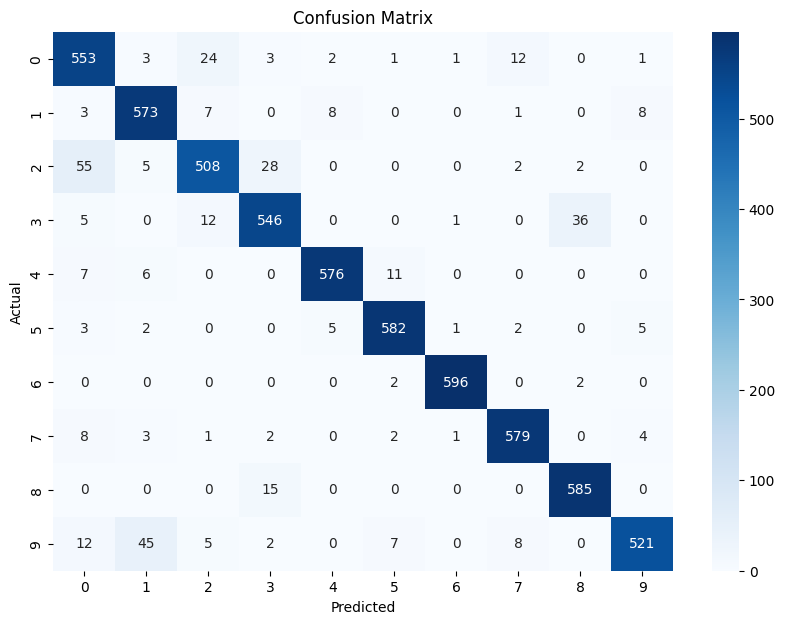

In [83]:
# Confusion Matrix
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()